In [11]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

Euler and Runge-Kutta methods for solving ODEs

The Euler method is a first-order numerical method for solving ODEs. It uses a forward difference approximation to estimate the derivative of the solution at each time step and updates the solution accordingly. The basic formula for Euler's method is,
\begin{equation}
 y_{n+1} = y_n + h \cdot f(t_n, y_n)
\end{equation}
where, $y_n$ is the approximate solution at time $t_n$, $h$ is the time step and $f(t_n, y_n)$ is the derivative of the solution at time $t_n$.

Euler method has a first-order global truncation error ($O(h)$), which means that the error in the approximation is proportional to the time step. It is simple to implement but may not be accurate for stiff ODEs with rapidly changing or oscillatory solutions.

Runge-Kutta methods are a family of numerical methods for solving ODEs. These methods work by approximating the solution of an ODE at discrete time steps, also known as time discretization. The most commonly used Runge-Kutta method is the fourth-order Runge-Kutta (RK4).

The RK4 method uses a weighted average of four derivative evaluations to estimate the derivative of the solution at each time step. The basic formula for RK4 is,

\begin{equation}
y_{n+1} = y_n + \frac{h}{6} \left( k_1 + 2k_2 + 2k_3 + k_4 \right),
\end{equation}

where $y_n$ is the approximate solution at time $t_n$, $h$ is the time step, and $k_1, k_2, k_3, k_4$ are the weighted derivatives of the solution at time $t_n$. The weighted derivatives are calculated as follows,
\begin{align}
k_1 &= f(t_n, y_n), \\
k_2 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_1 \right), \\
k_3 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_2 \right), \\
k_4 &= f\left(t_n + h, y_n + h \cdot k_3 \right).
\end{align}

RK4 has a fourth-order global truncation error ($O(h^4)$), so it is more accurate than Euler's method. It is also important to note that RK4 is more robust to stiff ODEs than Euler's method.

The following code compares the accuracy of Euler method and RK4 for solving the following first-order ODE,
\begin{equation}
\frac{dx}{dt} = -x
\end{equation}

where $x(0) = 1$.

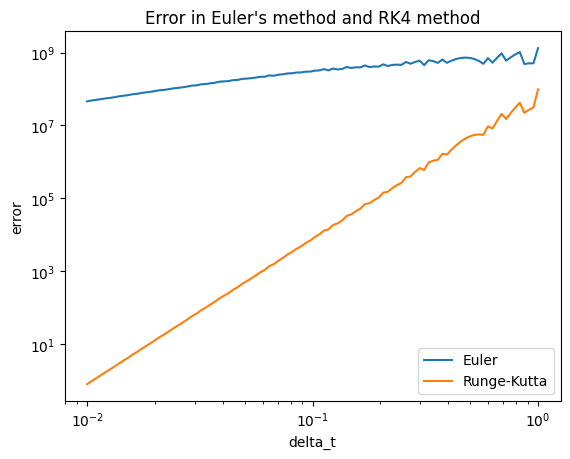

In [12]:
from ODEsolve import compare_euler_rk4_error

# Define the parameters for the forst-order ODE
x0 = 1 # Initial condition
t0 = 0 # Initial time
delta_t_values = np.logspace(-2, 0, 100) # Step sizes
f = lambda t, x: x # x' = x ODE
# Compare the error in Euler's method and Runge-Kutta's method for different step sizes
compare_euler_rk4_error(f, x0, t0, delta_t_values)


The plot above shows that RK4 is more accurate than Euler's method for different time steps. Because it is a fourth-order method, it uses higher-order polynomial approximations to estimate the slope of the solution curve at each time step. However, RK4 is more computationally expensive than Euler's method because it requires four derivative evaluations at each time step.
 
The following code implements Euler's method and RK4 for solving the following second-order ODE,
\begin{equation}
\frac{d^2 u}{dt^2} = -u
\end{equation}

where $u = (x,y)$, $x(0) = 1$ and $y(0) = 1$.

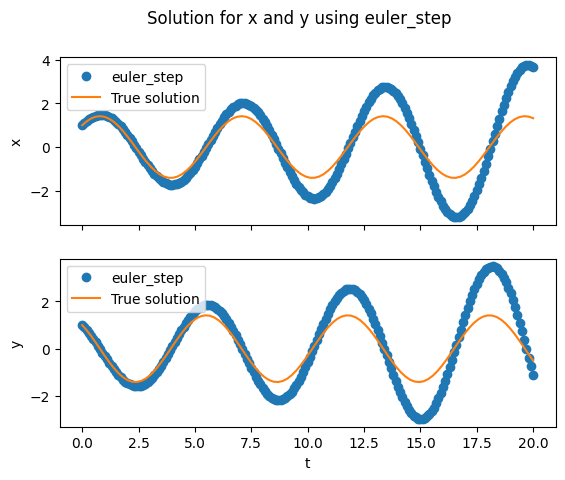

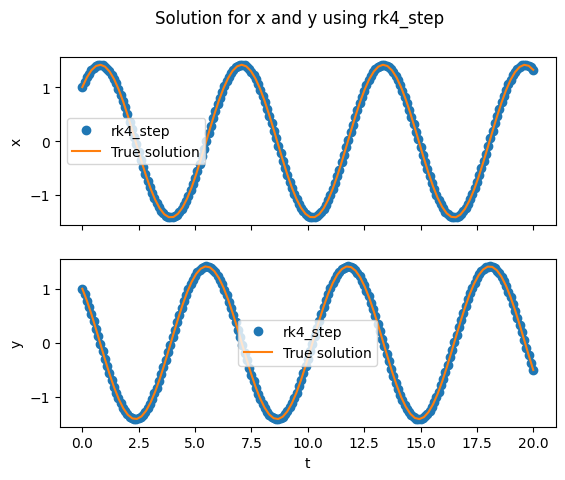

In [13]:
from ODEsolve import solve_euler_rk4, euler_step, rk4_step
# Define the 2nd order ODE x'' = -x
def f(t,u):
    x = u[0]
    y = u[1]
    dydt = -x
    dxdt = y
    return np.array([dxdt, dydt])

# Define the true solution for the 2nd order ODE x'' = -x
def true_sol(t):
    x = np.sin(t) + np.cos(t)
    y = np.cos(t) - np.sin(t)
    return np.array([x, y])

x0 = np.array([1, 1]) # Initial condition, x = 1, y = 1
deltat_max = 0.1 # Step size

# Solve for x and y using Euler's method and Runge-Kutta's method
solve_euler_rk4(f, x0, t0, deltat_max, euler_step, true_sol=true_sol)
solve_euler_rk4(f, x0, t0, deltat_max, rk4_step, true_sol=true_sol)


The plot above shows that, for a step size of $h = 0.1$, RK4 is very accurate while Euler's method is not. This is because of the aforementioned higher-order polynomial approximations used by RK4. 

Method of Lines

The method of lines (MOL) is a numerical method to approximate solutions to partial differential equations (PDEs) on a uniform discrete grid. It works by discretizing the spatial domain using finite differences. This then allows us to write the PDE as an initial value problem (IVP) or a boundary value problem (BVP) in ODEs, which can be solved using a numerical method. The method of lines is a general method that can be used to solve any PDE. However, it is most commonly used to solve PDEs with constant coefficients. The error for MOL is proportional to the step size in the spatial domain, so increasing the number of points in the grid makes the approximation more accurate.

BVPs are differential equations within a domain with defined constraints, called boundary conditions. Hence the solution to the PDE must satisfy these boundary conditions. There are three types of boundary conditions that can be applied to a BVP; Dirichlet, Neumann, and Robin. A Dirichlet boundary condition is where the boundary value is the solution. A Neumann boundary condition is where the derivative of the solution is the boundary value. A Robin boundary condition is a combination of Dirichlet and Neumann boundary conditions where the boundary value is the derivative of the solution plus a function.

To illustrate the use of finite differences with these boundary conditions, we can consider the BVP,
\begin{equation}
 d^2u/dx^2 + q(x) = 0, u(a) = 0, u(b) = 0.
\end{equation}
We will set $q(x) = 1$, $a = 0$, and $b = 1$ for simplicity. By applying Dirichlet boundary conditions and obtaining different solutions we can see how the approximations differ from the exact solution $u_{\text{exact}} = \frac{1}{2} \cdot x \cdot (1 - x)$. For Neumann and Robin boundary conditions, the approximations are not similar to the exact solution but are similar to one another. This is because the Neumann and Robin boundary conditions impose constraints on the derivative of the solution at the boundary, rather than providing the values of the solution itself.

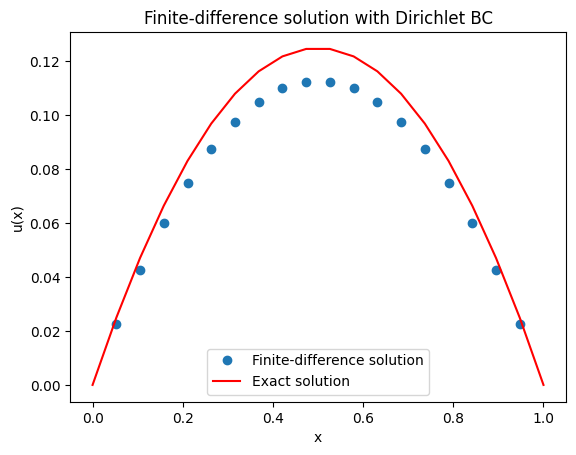

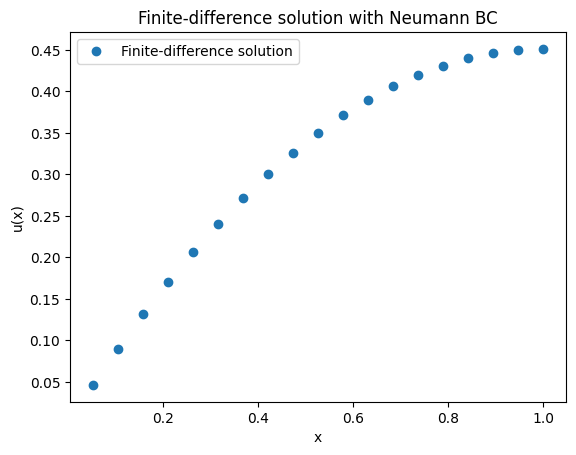

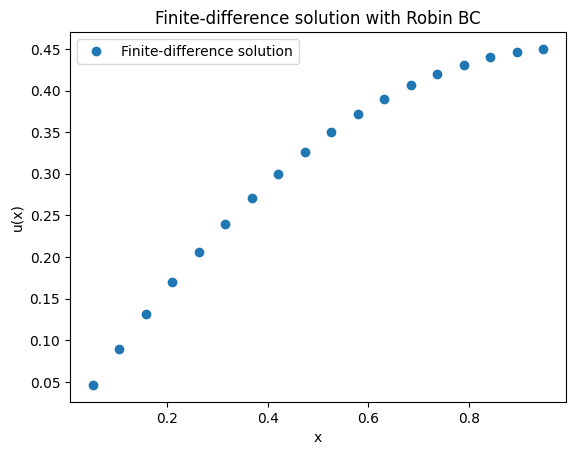

In [14]:
from BVPsolve import solve_bvp
N = 21; a = 0; b = 1
alpha = 0; beta = 0; gamma = 1; delta = 0
q = lambda x: np.ones(np.size(x))
solve_bvp(N, a, b, alpha, beta, q, "dirichlet")
solve_bvp(N, a, b, alpha, beta, q, "neumann", delta=delta)
solve_bvp(N, a, b, alpha, beta, q, "robin", gamma=gamma)

For each type of boundary condition, the numerical approximation has a significant truncation error when $N = 21$. By setting $N = 101$ the step size is much smaller therefore, the error is much smaller.

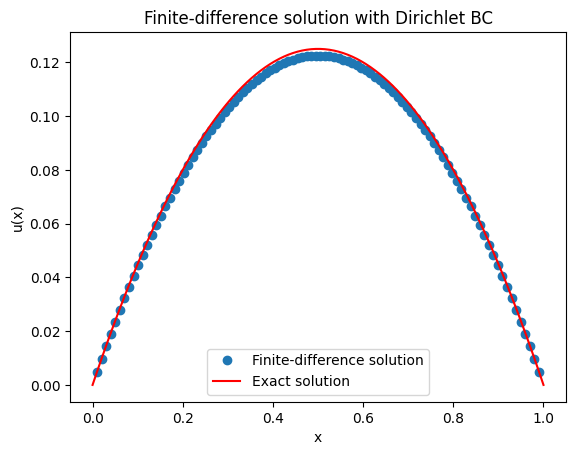

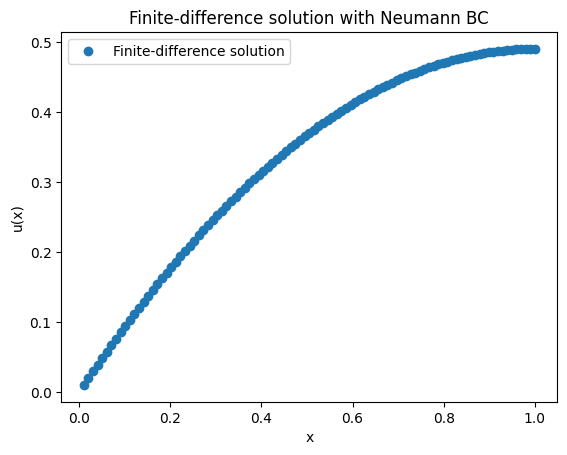

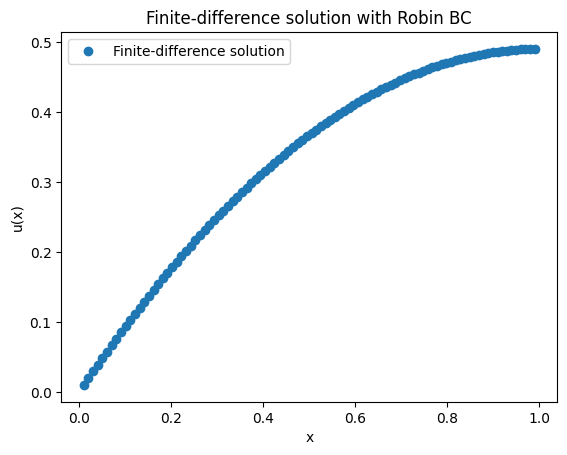

In [15]:
N = 101
solve_bvp(N, a, b, alpha, beta, q, "dirichlet")
solve_bvp(N, a, b, alpha, beta, q, "neumann", delta=delta)
solve_bvp(N, a, b, alpha, beta, q, "robin", gamma=gamma)

Explicit Euler, Implicit Euler, and Crank-Nicolson Methods for PDEs using Method of Lines

PDEs can be converted to a system of ODEs using the method of lines and can therefore be solved using numerical methods for ODEs. 

The explicit Euler method, as mentioned earlier, is a first-order method that approximates the derivative in time using a forward difference. But because a system of ODEs is being solved, the central difference approximation is also used to evaluate the second derivative in space. The basic formula for the explicit Euler method therefore becomes,

\begin{equation}
u_{x,t+1} = u_{x,t} + \frac{D\Delta t}{(\Delta x)^2}* \left( u_{x+1,t} - 2u_{x,t} + u_{x-1,t} \right),
\end{equation}

where $u_{x,t}$ is the approximate solution at time $t$ and space $x$, $\Delta t$ is the time step, $\Delta x$ is the space step, and $D$ is the diffusion coefficient.

This is the simplest method for solving a system of ODEs but it has some drawbacks. The method is first-order accurate in time and second-order accurate in space making it the least accurate of the three methods.  It is also unstable if,

\begin{equation}
\frac{D\Delta t}{(\Delta x)^2} > \frac{1}{2},
\end{equation}

which can be restrictive for small values of $\Delta x$. The explicit Euler method is also unsuitable for solving stiff ODEs because it is a first-order method. 

The implicit Euler method is a first-order method that approximates the derivative in time using a backward difference instead. This means that the method is unconditionally stable. However, it is computationally more expensive than the explicit Euler method when computing the next time step. The basic formula for the implicit Euler method is,

\begin{equation}
u_{x,t+1} = u_{x,t} + \frac{D\Delta t}{(\Delta x)^2}* \left( u_{x+1,t+1} - 2u_{x,t+1} + u_{x-1,t+1} \right).
\end{equation}

Because, like explicit Eluer, the implicit Euler method is a first-order method, it is not suitable for solving stiff ODEs either. Also like explicit Euler, the implicit Euler method is first-order accurate in time and second-order accurate in space so it is still not very accurate. 

The Crank-Nicolson method is a second-order method that approximates the derivative in time using a central difference. This means that the method is unconditionally stable and is suitable for solving stiff ODEs. It is also more accurate than the other two methods too because it is second-order accurate in time and space. The basic formula for the Crank-Nicolson method is,
\begin{equation}
u_{x,t+1} = u_{x,t} + \frac{D\Delta t}{2(\Delta x)^2}* \left( u_{x+1,t+1} - 2u_{x,t+1} + u_{x-1,t+1} \right) + \frac{D\Delta t}{2(\Delta x)^2}* \left( u_{x+1,t} - 2u_{x,t} + u_{x-1,t} \right).
\end{equation}

where all variables are the same as in the implicit Euler method. 
Crank-Nicolson uses a central difference approximation for both the first and second derivatives.

To illustrate the use of each method, we can consider the second-order PDE for heat diffusion,

\begin{equation}
\frac{du}{dt} = \kappa \frac{d^2 u}{dx^2}, 0 < x < L, 0 < t < T,
\end{equation}

with zero-temperature boundary conditions, $u=0$ at $x=0,L$, $t>0$, and the initial temperature function, $u_I = \sin (\frac{\pi x}{L})$.

The code uses a uniform grid with $N_x$ grid points in the $x$-direction and $N_t$ grid points in the $t$-direction. The step size in the $x$-direction is $h = L/(N_x - 1)$ and the step size in the $t$-direction is $k = T/(N_t - 1)$. The code uses a forward difference approximation for the first derivative and a central difference approximation for the second derivative. The code also uses a forward difference approximation for the time derivative.